# Convolutional Neural Network Using Keras for MNIST Data Set

In [20]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import tensorflow.keras as keras
import math
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



I will implement a convolutional neural network to solve a handwriting recognition problem. The neural network will classify a hand-written digit. 

<br>

I will work with the MNIST data set, a famous collection of images used for handwriting recognition. It contains labeled images of handwritten digits from 0 to 9. Therefore, the label is a digit from 0 and 9. <br>This is a multiclass classification problem. 


<br>

Each example corresponds to one hand-written image. The features will be comprised of numerical feature vectors (an n-dimensional array) that contain grey-scale pixel values that range from 0 to 255.



## Importing the Data Set and Creating Training and Test Sets

The MNIST data set comes preloaded in Keras. The `load_data()` function returns the data set split into training and test subsets. The cell below loads the data set and contains training and test data.


In [21]:
 mnist = keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()


Inspecting the datatype and dimensions (shape) of the training and test data (`X_train`, `y_train`, `X_test`, `y_test`). 

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The training and test data sets are NumPy arrays. 

* <b>Training data:</b><br>
    `X_train` is a three-dimensional array of shape `(60000, 28, 28)`. It contains grayscale image data. Pixel values range from 0 to 255.<br>
    `y_train` is a one-dimensional array with shape `(6000,)`. It contains digit labels (integers in range 0-9).


* <b>Test data:</b><br>
    `X_test` is a three-dimensional array of shape `(10000, 28, 28)`. It contains grayscale image data. Pixel values range from 0 to 255.<br>`y_test` is a one-dimensional array with shape `(1000,)`. It contains digit labels (integers in range 0-9).

Inspecting the first example (which contains an image) in `X_train`:

In [23]:
X_train[0].shape

(28, 28)

In [24]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

As expected, the first example in the training data is a 28 x 28 array.  This array encodes the grayscale value of the  hand-written image, i.e., each entry in the 28 x 28 array encodes the intensity (darkness) of the corresponding pixel. 

### Visualizing the Data

 By using the Seaborn`heatmap()` function I will display the first image contained in `X_train`.

<Axes: >

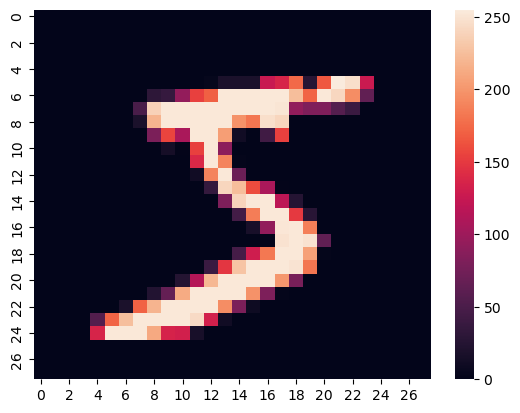

In [25]:
sns.heatmap(X_train[0])

Inspecingt the corresponding label in `y_train` to confirm that the label matches the image we see in the heatmap above.

In [26]:
y_train[0]

5

Function `plot_imgs()` is created to help visualize the image data. 

In [27]:
def plot_imgs(images, labels=None):
    subplots_x = int(math.ceil(len(images) / 5))
    plt.figure(figsize=(10,2*subplots_x))
    for i in range(min(len(images), subplots_x*5)):
        plt.subplot(subplots_x,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel(labels[i])
    plt.show()

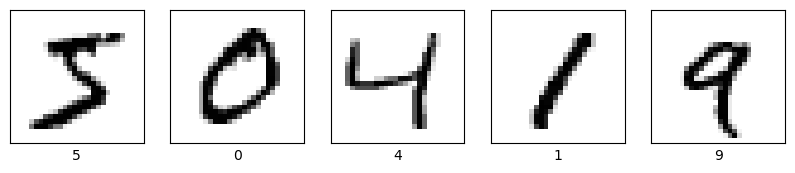

In [28]:
plot_imgs(X_train[:5], y_train[:5])

## Data Preparation


#### Scale the Data

This MNIST data is raw data containing pixel values between 0 and 255. Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the training process. Therefore, it is a good practice to normalize the pixel values so that each pixel has a value between 0 and 1. This can be done by dividing all pixels values by the largest pixel value; that is 255. 


In [29]:
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train[:5])
print(X_test[:5])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 

#### Reshape the Data
A CNN in Keras requires a 4-dimensional array as input in the form: `(num_examples, image_dimension_X, image_dimension_Y, num_channels)`.

Since grayscale has only one color channel, every example in `X_train` would have the shape `(28, 28, 1)`. `X_test` should have the same dimensions.

1. reshape every example in `X_train` to have the shape `(num_examples_X_train, 28, 28, 1)`.
1. reshape every example in `X_test` to have the shape `(num_examples_X_test, 28, 28, 1)`.


In [30]:
#num_examples_X_train = X_train.shape[0]
#num_examples_X_test = X_test.shape[0]
X_train = np.reshape(X_train, newshape=(X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, newshape=(X_test.shape[0], 28, 28, 1))

print(X_train.shape)
X_test.shape

(60000, 28, 28, 1)


(10000, 28, 28, 1)

## Constructing the Convolutional Neural Network

### Step 1. Define Model Structure

Now I will create the convolutional neural network structure. A CNN has three different types of hidden layers: a convolutional layer, a pooling layer, and a fully connected layer. When constructing a convolutional hidden layer, I will compose a 2D convolution, followed by a batch normalization, followed by an activation function. 

  

In [31]:
# CNN model object
cnn_model = keras.Sequential()

# Creating the input layer and adding it to the model object 
input_layer = keras.layers.InputLayer(input_shape = X_train.shape[1:])
cnn_model.add(input_layer)

# Creating the first convolutional layer and adding it to the model object
conv_1 = keras.layers.Conv2D(filters=16, kernel_size=(3,3))
batchNorm_1 = keras.layers.BatchNormalization()
ReLU_1 = keras.layers.ReLU()

cnn_model.add(conv_1) 
cnn_model.add(batchNorm_1)
cnn_model.add(ReLU_1)

# Second convolutional layer 
conv_2 = keras.layers.Conv2D(filters=32, kernel_size=(3,3))
batchNorm_2 = keras.layers.BatchNormalization()
ReLU_2 = keras.layers.ReLU()

cnn_model.add(conv_2) 
cnn_model.add(batchNorm_2)
cnn_model.add(ReLU_2)

# 5. Third convolutional layer
conv_3 = keras.layers.Conv2D(filters=64, kernel_size=(3,3))
batchNorm_3 = keras.layers.BatchNormalization()
ReLU_3 = keras.layers.ReLU()

cnn_model.add(conv_3) 
cnn_model.add(batchNorm_3)
cnn_model.add(ReLU_3)

# 6. Fourth convolutional layer
conv_4 = keras.layers.Conv2D(filters=128, kernel_size=(3,3))
batchNorm_4 = keras.layers.BatchNormalization()
ReLU_4 = keras.layers.ReLU()

cnn_model.add(conv_4) 
cnn_model.add(batchNorm_4)
cnn_model.add(ReLU_4)

# 7. Pooling layer 
pooling_layer = keras.layers.GlobalAveragePooling2D()
cnn_model.add(pooling_layer) 

# 8. Output layer 
output_layer =  keras.layers.Dense(units=10)
cnn_model.add(output_layer) 



cnn_model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,402 (388.29 KB)

 Trainable params: 98,922 (386.41 KB)

 Non-trainable params: 480 (1.88 KB)

### Defining the Optimization Function

Creating a stochastic gradient descent optimizer using  `keras.optimizers.SGD()`.

In [32]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

### Defining the loss function

Creating a sparse categorical cross entropy loss function using `keras.losses.SparseCategoricalCrossentropy()`. 

In [33]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

### Compiling the model

In [34]:
cnn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

## Fitting the Model to the Training Data

In [35]:
num_epochs = 1 # Number of epochs

t0 = time.time() # start time

history = cnn_model.fit(X_train, y_train, epochs=num_epochs)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.8190 - loss: 0.7054
Elapsed time: 98.91s


## Evaluating the Model's Performance

Let's now evaluate the CNN model's performance on the test data and see how it did.


In [36]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9378 - loss: 0.2021
Loss:  0.18387651443481445 Accuracy:  0.944599986076355


Now I'll make some predictions on the test set and see how accurate these predictions are.
<br>
The result should be a display of the first 25 images in the test set `X_test`, and below each image, a display of the predicted digit.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


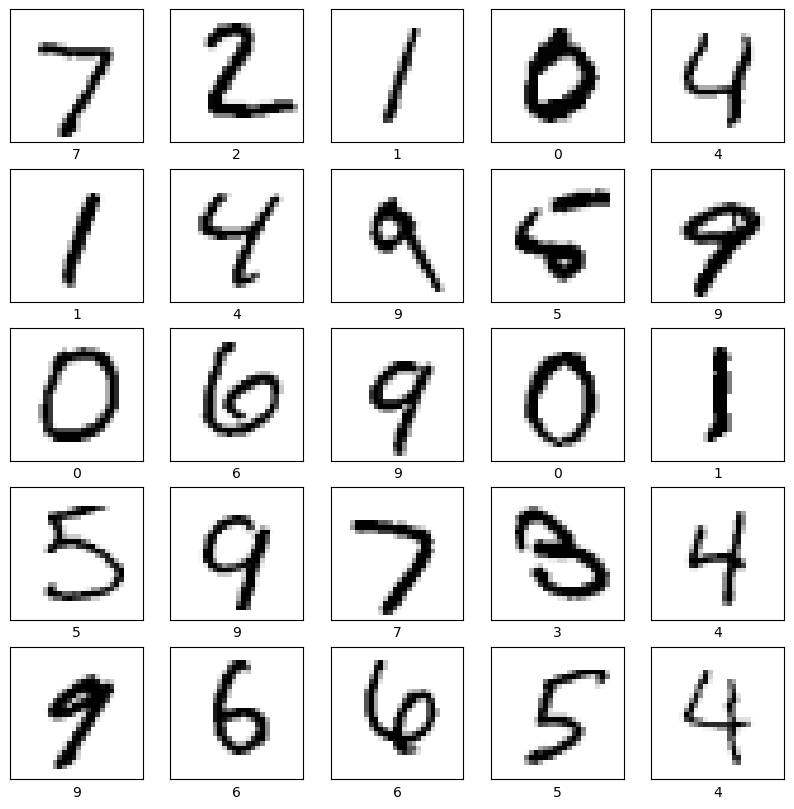

In [37]:
# Make predictions on the test set
logits = cnn_model.predict(X_test)
predictions = logits.argmax(axis = 1)


## Plot individual predictions
plot_imgs(X_test[:25], predictions[:25])


Based on model's performance, it is able to classify the correct digit 94% of the time. <br>
The 